Loading processed Kepler data...
Data loaded successfully.
X_train shape: (7651, 42)
y_train shape: (7651,)
Class distribution in training data:
koi_disposition
FALSE POSITIVE    3871
CONFIRMED         2197
CANDIDATE         1583
Name: count, dtype: int64

Training Random Forest model with class_weight='balanced'...
Training complete!

Generating Feature Importances Plot...


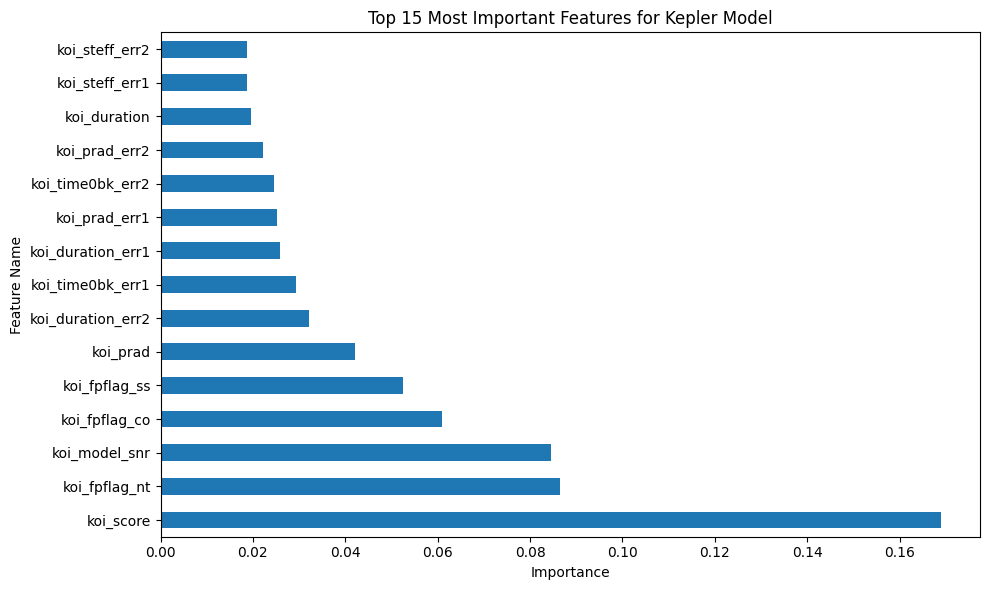

Feature importances plot displayed.

Evaluating model performance on the test set...
Generating Confusion Matrix Plot...


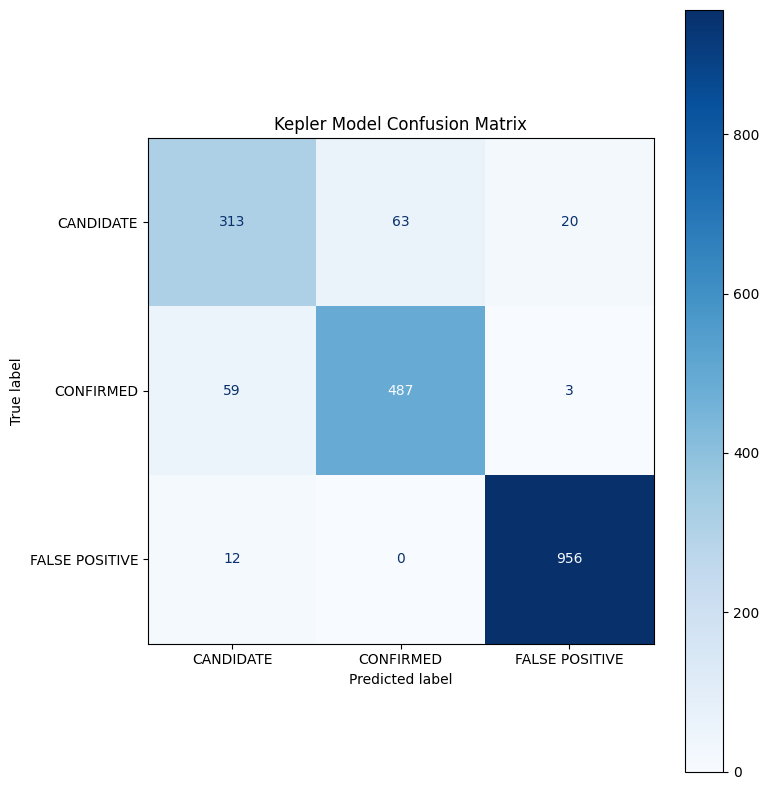


Classification Report:
                precision    recall  f1-score   support

     CANDIDATE       0.82      0.79      0.80       396
     CONFIRMED       0.89      0.89      0.89       549
FALSE POSITIVE       0.98      0.99      0.98       968

      accuracy                           0.92      1913
     macro avg       0.89      0.89      0.89      1913
  weighted avg       0.92      0.92      0.92      1913



In [ ]:
# training

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import os

# --- Step 1: Load the Data ---
print("Loading processed Kepler data...")
data_path = 'processed_data_clean'
try:
    X_train = pd.read_csv(os.path.join(data_path, 'kepler_X_train.csv'))
    y_train = pd.read_csv(os.path.join(data_path, 'kepler_y_train.csv')).squeeze()
    X_test = pd.read_csv(os.path.join(data_path, 'kepler_X_test.csv'))
    y_test = pd.read_csv(os.path.join(data_path, 'kepler_y_test.csv')).squeeze()

    print("Data loaded successfully.")
    print(f"X_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")
    print("Class distribution in training data:")
    print(y_train.value_counts())
except FileNotFoundError:
    print("Error: Files not found. Please ensure they are in the 'processed_data_clean' directory.")
    # Exit the script if files are not found
    exit()

# --- Step 2: Train the Random Forest Model ---
print("\nTraining Random Forest model with class_weight='balanced'...")
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
print("Training complete!")

# --- Step 3: Visualize Feature Importances ---
print("\nGenerating Feature Importances Plot...")
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
top_features = feature_importances.nlargest(15)

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title('Top 15 Most Important Features for Kepler Model')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()
print("Feature importances plot displayed.")

# --- Step 4: Evaluate the Model with a Confusion Matrix ---
print("\nEvaluating model performance on the test set...")
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)

print("Generating Confusion Matrix Plot...")
plt.figure(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
plt.title('Kepler Model Confusion Matrix')
plt.tight_layout()
plt.show()

# Print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [6]:
# Save the trained model to a file
import joblib
model_file_path = 'kepler_rf_model.joblib'
joblib.dump(model, model_file_path)
print(f"Model saved successfully as '{model_file_path}'.")

Model saved successfully as 'kepler_rf_model.joblib'.


In [ ]:
# using the model

import pandas as pd
import joblib
import numpy as np

# --- Step 1: Load the Trained Model ---
print("Loading the trained Kepler model...")
try:
    model = joblib.load('kepler_rf_model.joblib')
    print("Model loaded successfully.")
except FileNotFoundError:
    print("Error: 'kepler_rf_model.joblib' not found. Please ensure the file is in the same directory.")
    exit()

# --- Step 2: Create a New Data Point for Prediction ---
# This is a sample data point for demonstration.
# You will replace these values with the features of a new object you want to predict.
# The number and order of the features must match your X_train data.
new_planet_data = {
    'kepid': [11513441],
    'koi_score': [0.99],
    'koi_fpflag_nt': [0],
    'koi_fpflag_ss': [0],
    'koi_fpflag_co': [0],
    'koi_fpflag_ec': [0],
    'koi_period': [245.549],
    'koi_period_err1': [0.0003],
    'koi_period_err2': [-0.0003],
    'koi_time0bk': [15.2],
    'koi_time0bk_err1': [0.006],
    'koi_time0bk_err2': [-0.006],
    'koi_impact': [0.05],
    'koi_impact_err1': [0.007],
    'koi_impact_err2': [-0.007],
    'koi_duration': [3.5],
    'koi_duration_err1': [0.1],
    'koi_duration_err2': [-0.1],
    'koi_depth': [1500.0],
    'koi_depth_err1': [50.0],
    'koi_depth_err2': [-50.0],
    'koi_prad': [1.5],
    'koi_prad_err1': [0.1],
    'koi_prad_err2': [-0.1],
    'koi_teq': [350.0],
    'koi_insol': [20.5],
    'koi_insol_err1': [3.0],
    'koi_insol_err2': [-3.0],
    'koi_model_snr': [50.0],
    'koi_tce_plnt_num': [1],
    'koi_steff': [5800.0],
    'koi_steff_err1': [100.0],
    'koi_steff_err2': [-100.0],
    'koi_slogg': [4.5],
    'koi_slogg_err1': [0.1],
    'koi_slogg_err2': [-0.1],
    'koi_srad': [0.9],
    'koi_srad_err1': [0.05],
    'koi_srad_err2': [-0.05],
    'ra': [290.0],
    'dec': [45.0],
    'koi_kepmag': [14.0]
}

# Create a DataFrame from the new data
new_planet_df = pd.DataFrame(new_planet_data)

# --- Step 3: Make the Prediction ---
print("Making a prediction...")
prediction = model.predict(new_planet_df)

print("\nThe model's prediction is:")
print(prediction)

print("\n---")
print("You can try your own data by replacing the values in the 'new_planet_data' dictionary.")

Loading the trained Kepler model...
Model loaded successfully.
Making a prediction...

The model's prediction is:
['CONFIRMED']

---
You can try your own data by replacing the values in the 'new_planet_data' dictionary.


Loading test data and the trained model...
Files loaded successfully from: processed_data_clean\kepler_X_test.csv and processed_data_clean\kepler_y_test.csv
Testing accuracy on 1913 data points from the test set.

Making predictions on the test set...

Generating Confusion Matrix and Classification Report...


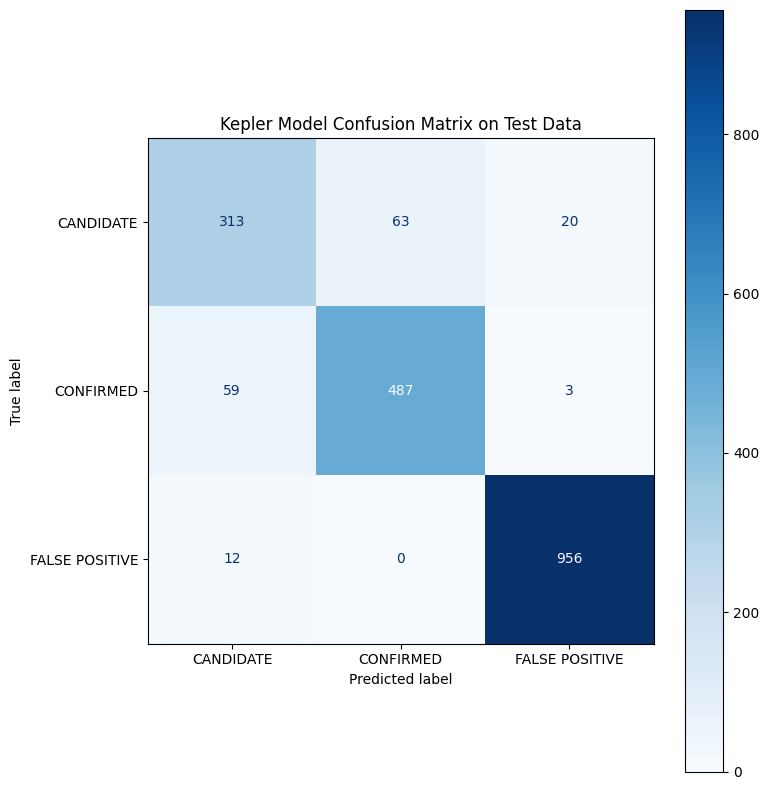


Classification Report:
                precision    recall  f1-score   support

     CANDIDATE       0.82      0.79      0.80       396
     CONFIRMED       0.89      0.89      0.89       549
FALSE POSITIVE       0.98      0.99      0.98       968

      accuracy                           0.92      1913
     macro avg       0.89      0.89      0.89      1913
  weighted avg       0.92      0.92      0.92      1913



In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os
import joblib


print("Loading test data and the trained model...")
try:
    data_path = 'processed_data_clean'
    X_test_file = os.path.join(data_path, 'kepler_X_test.csv')
    y_test_file = os.path.join(data_path, 'kepler_y_test.csv')
    
    X_test = pd.read_csv(X_test_file)
    y_test = pd.read_csv(y_test_file).squeeze()
    

    model_file_path = 'kepler_rf_model.joblib'
    model = joblib.load(model_file_path)
    
    print(f"Files loaded successfully from: {X_test_file} and {y_test_file}")
    print(f"Testing accuracy on {len(X_test)} data points from the test set.")

except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure the 'processed_data_clean' directory and the 'kepler_rf_model.joblib' file exist.")
    exit()


print("\nMaking predictions on the test set...")
y_pred = model.predict(X_test)


print("\nGenerating Confusion Matrix and Classification Report...")


conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)


plt.figure(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
plt.title('Kepler Model Confusion Matrix on Test Data')
plt.tight_layout()
plt.show()


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import os


print("Loading the full, cleaned Kepler dataset for cross-validation...")
try:
    data_path = 'processed_data_clean'
    X = pd.read_csv(os.path.join(data_path, 'kepler_X_train.csv'))
    y = pd.read_csv(os.path.join(data_path, 'kepler_y_train.csv')).squeeze()


    X_test = pd.read_csv(os.path.join(data_path, 'kepler_X_test.csv'))
    y_test = pd.read_csv(os.path.join(data_path, 'kepler_y_test.csv')).squeeze()
    

    X_full = pd.concat([X, X_test], ignore_index=True)
    y_full = pd.concat([y, y_test], ignore_index=True)

    print(f"Full dataset loaded. Shape: {X_full.shape}")

except FileNotFoundError:
    print("Error: Files not found. Please ensure they are in the 'processed_data_clean' directory.")
    exit()



model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


print("\nPerforming 5-fold cross-validation...")
cv_scores = cross_val_score(model, X_full, y_full, cv=skf, scoring='accuracy')

print("\nCross-Validation Results:")
print(f"Individual fold scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.2f}")
print(f"Standard deviation of scores: {cv_scores.std():.2f}")

Loading the full, cleaned Kepler dataset for cross-validation...
Full dataset loaded. Shape: (9564, 42)

Performing 5-fold cross-validation...

Cross-Validation Results:
Individual fold scores: [0.92263461 0.915839   0.91688447 0.92158913 0.92468619]
Mean accuracy: 0.92
Standard deviation of scores: 0.00
